<a href="https://colab.research.google.com/github/Juddt/Projet-Python-DAVROUX-DIDENOT/blob/main/Projet_python_DAVROUX_DIDENOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install yfinance


Nous utilisons la bibliothèque Python yfinance pour extraire des données boursières en temps réel. Cette méthode nous permet de récupérer des prix actualisés toutes les 5 minutes (Consigne 1) via une interface simplifiée de web scraping (Consigne 2)

In [38]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


Apple car c'est l'actif avec la plus grande capitalisation boursière, ce qui garantit une liquidité parfaite pour vos tests en temps réel.

In [54]:
def get_price( ticker) :
    ticker= yf.Ticker( ticker)
    price=ticker.fast_info[ "last_price"]
    return price

def get_currency(ticker) :
    ticker=yf.Ticker(ticker)
    currency =ticker.fast_info[ "currency" ]
    return currency


ticker_appl= "AAPL"
aapl_price= get_price(ticker_appl)
aapl_currency = get_currency(ticker_appl)
print("Asset : ", ticker_appl )
print(f"Current price :  {aapl_price:.2f} ")
print(f"Devise :  {aapl_currency}")



Asset :  AAPL
Current price :  271.01 
Devise :  USD


In [55]:
data = yf.download(
    ticker_appl,
    period="1mo",
    interval="5m"
)


/tmp/ipython-input-4236326794.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


In [56]:
data_clean = data["Close"].reset_index()
data_clean.columns = ["Datetime", "Close"]

data_clean.head()


,Datetime,Close
0,2025-12-03 14:30:00+00:00,287.570007
1,2025-12-03 14:35:00+00:00,288.220093
2,2025-12-03 14:40:00+00:00,287.725586
3,2025-12-03 14:45:00+00:00,287.154999
4,2025-12-03 14:50:00+00:00,287.369995


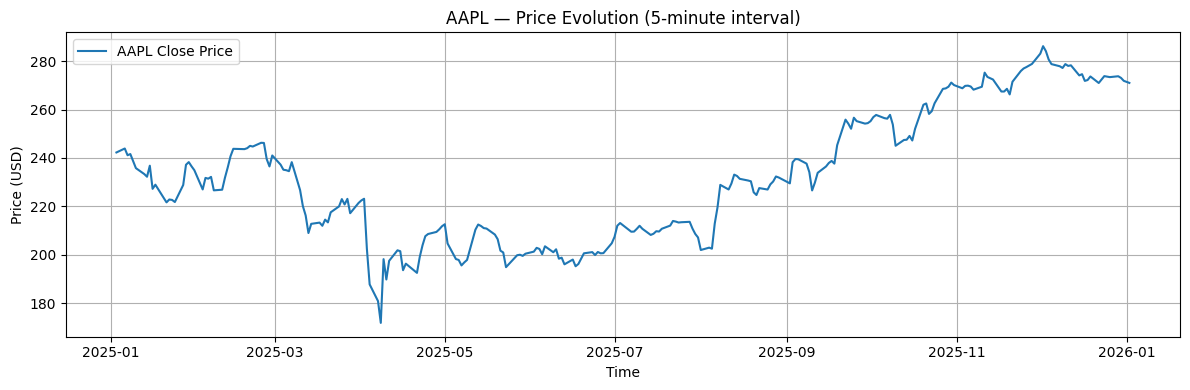

In [119]:
plt.figure(figsize=(12, 4))

plt.plot(
    data_clean["Datetime"],
    data_clean["Close"],
    label="AAPL Close Price"
)

plt.title("AAPL — Price Evolution (5-minute interval)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [120]:
differents_timeframes = {
    "Court terme (1 mois)":   {"period": "1mo", "interval": "5m" ,"sma_window": 78  } ,
    "Moyen terme (6 mois)":   {"period": "6mo", "interval": "1h", "sma_window": 20},
    "Long terme (1 an)":      {"period": "1y",  "interval": "1d", "sma_window": 20 } }

selected_view = "Long terme (1 an)"
# selected_view2 = "Moyen terme (6 mois)"


params = differents_timeframes[selected_view]
# params2 = differents_timeframes[selected_view2]

data = yf.download(
    ticker_appl,
    period=params["period"],
    interval=params["interval"],
    progress=False )

# data2 = yf.download(
#     ticker_appl,
#     period=params2["period"],
#     interval=params2["interval"],
#     progress=False )


prices_aapl = data["Close"].reset_index()
prices_aapl.columns = ["Datetime", "Close"]

# prices_aapl2 = data2["Close"].reset_index()
# prices_aapl2.columns = ["Datetime", "Close"]

/tmp/ipython-input-1179576679.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


In [121]:
# plt.figure(figsize=(12, 4))
# plt.plot(data_clean["Datetime"], data_clean["Close"], label="AAPL Close Price")
# plt.title(f"AAPL — {selected_view}")
# plt.xlabel("Time")
# plt.ylabel("Price (USD)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(12, 4))
# plt.plot(prices_aapl2["Datetime"], prices_aapl2["Close"], label="AAPL Close Price")
# plt.title(f"AAPL — {selected_view2}")
# plt.xlabel("Time")
# plt.ylabel("Price (USD)")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()



In [136]:
#strategy 1 Buy and hold

# calcule des rendements
prices_aapl["Return"] = prices_aapl["Close"].pct_change()

initial_capital = 200
# initial_capital2 = 200

prices_aapl["Buy and Hold"] = ( (1 + prices_aapl["Return"].fillna(0)).cumprod() * initial_capital)


# strategie12= "Buy and Hold2"
# prices_aapl["Buy and Hold2"] =  (1 + prices_aapl["Return"].fillna(0)).cumprod() * initial_capital2
# prices_aapl.head()

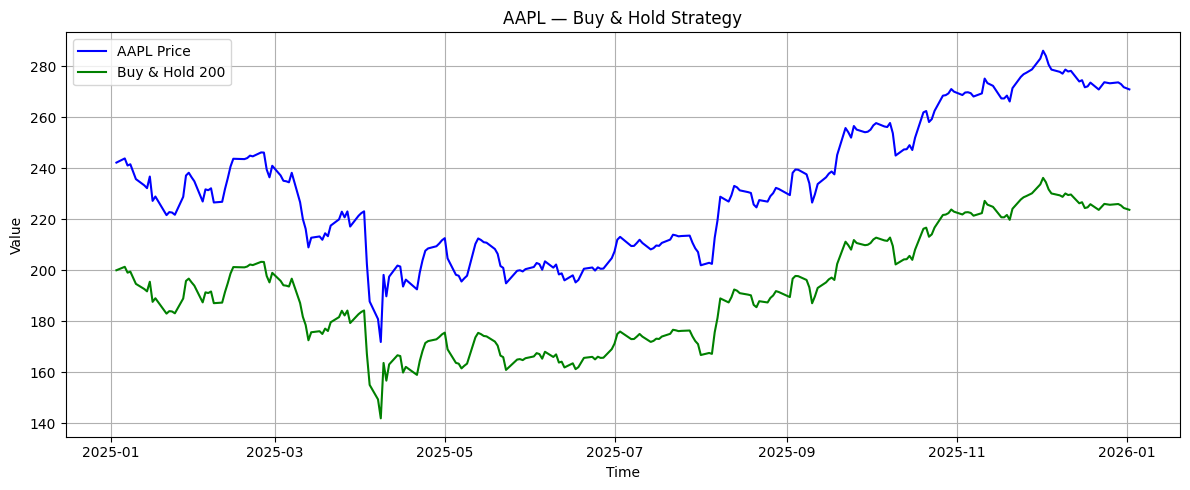

In [137]:
plt.figure(figsize=(12, 5))

# Courbe du prix
plt.plot(
    prices_aapl["Datetime"],
    prices_aapl["Close"],
    label="AAPL Price",
    color="blue"
)

# Courbe Buy & Hold
plt.plot(
    prices_aapl["Datetime"],
    prices_aapl["Buy and Hold"],
    label=f"Buy & Hold {initial_capital}",
    color="green"
)

# # Courbe Buy & Hold2
# plt.plot(
#     prices_aapl["Datetime"],
#     prices_aapl["Buy and Hold2"],
#     label=f"Buy & Hold {initial_capital2}",
#     color="red"
# )

plt.title("AAPL — Buy & Hold Strategy")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


analyse whatsapp


To avoid look-ahead bias, trading positions are shifted by one period so that decisions rely strictly on past information.

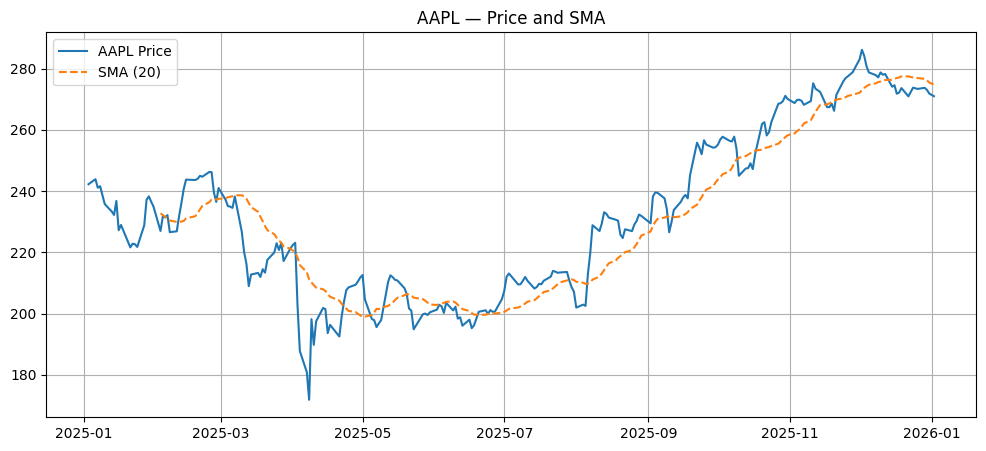

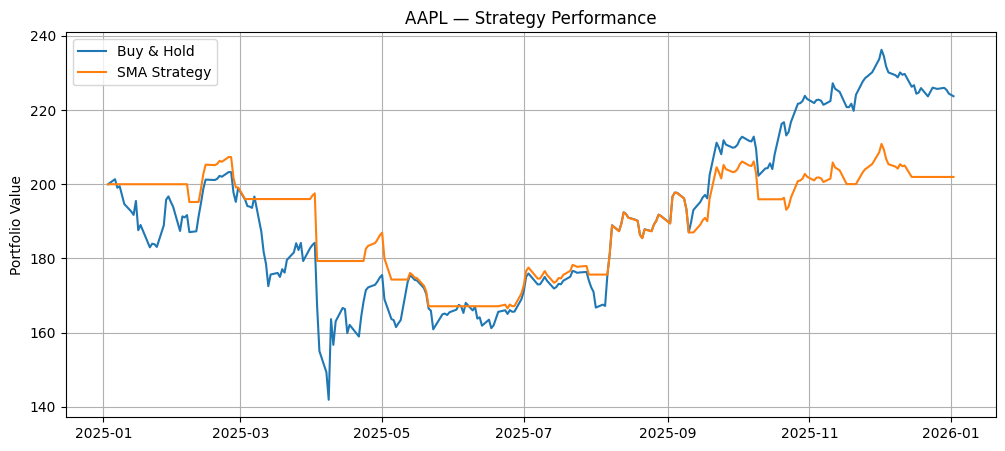

In [141]:


plt.figure(figsize=(12, 5))
plt.plot(prices_aapl["Datetime"], prices_aapl["Close"], label="AAPL Price")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA"], label="SMA (20)", linestyle="--")
plt.title("AAPL — Price and SMA")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(prices_aapl["Datetime"], prices_aapl["Buy and Hold"], label="Buy & Hold")
plt.plot(prices_aapl["Datetime"], prices_aapl["SMA_Strategy"], label="SMA Strategy")
plt.title("AAPL — Strategy Performance")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()
